In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [2]:
shots_spot_train = pd.read_csv('./assets/mpd/shots_spot_train.csv', index_col='Unnamed: 0')
shots_spot_test  = pd.read_csv('./assets/mpd/shots_spot_test.csv', index_col='Unnamed: 0')

In [3]:
shots_spot_train.fillna(0, inplace=True)
shots_spot_test.fillna(0, inplace=True)

In [4]:
shots_spot_train = shots_spot_train.set_index('date')
shots_spot_test  = shots_spot_test.set_index('date')

In [23]:
X = shots_spot_train.drop(['type_multiple_gunshots', 'type_single_gunshot', 'district'], axis=1)
y = shots_spot_train['type_multiple_gunshots']

In [24]:
# to make this a classification problem
def binary(y):
        if y > 0:
            return 1
        else:
            return 0

y = y.map(binary)

In [25]:
# baseline
y.value_counts(normalize=True)

0    0.599883
1    0.400117
Name: type_multiple_gunshots, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7670, 8), (2557, 8), (7670,), (2557,))

In [28]:
ss  = StandardScaler()
rfc = RandomForestClassifier()

In [29]:
X_train_s = ss.fit_transform(X_train)
X_test_s  = ss.transform(X_test)

In [30]:
rfc.fit(X_train_s, y_train)
rfc.score(X_train_s, y_train)

0.9830508474576272

In [31]:
rfc.score(X_test_s, y_test)

0.7590926867422761

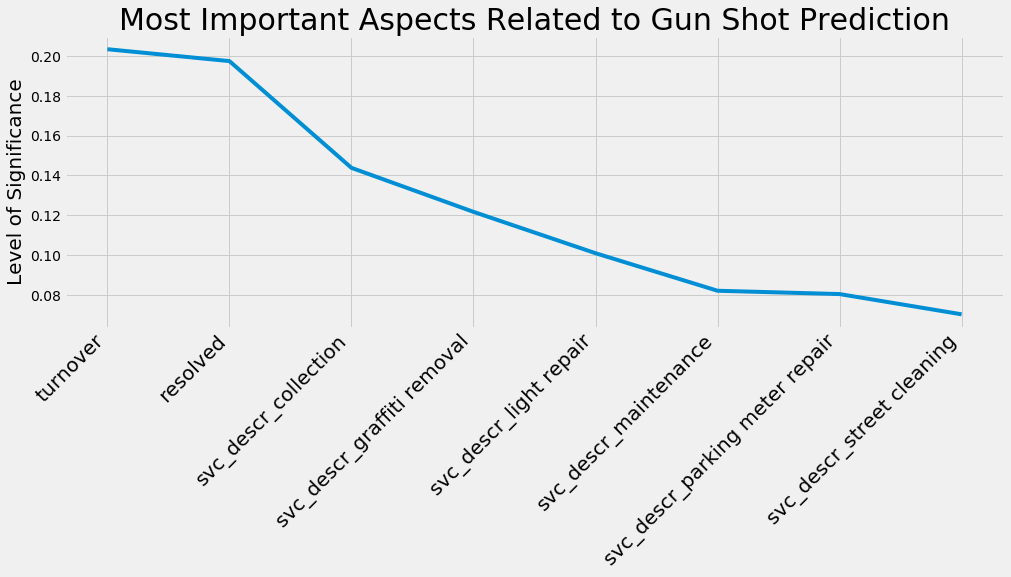

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(9))
ax.set_title('Most Important Aspects Related to Gun Shot Prediction', size=30)
ax.set_ylabel('Level of Significance', size=20)
ax.set_xticklabels(X_train.columns, rotation=45, ha='right', minor=False, size=20);

In [19]:
X1_feat = shots_spot_train[shots_spot_train.district == 1].drop(['district', 'type_multiple_gunshots', 'type_single_gunshot'], axis=1)
y1_targ = shots_spot_train[shots_spot_train.district == 1][shots_spot_train.type_multiple_gunshots + shots_spot_train.type_single_gunshot]

In [20]:
lr = LinearRegression()

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_feat, y1_targ, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1461, 10227]